## Ecommerce Data
Christina Song
EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
import re
warnings.filterwarnings("ignore")

### Basic Data Exploration

In [2]:
ecom = pd.read_excel('Ecommerce data.xlsx')

### Variables

There are 33K records for an online book seller.


|   Variable   |  Description  |
| :----------- | :------------ |
| id | individual customer id |
| logtarg | ? |
| r | recency, smaller number most recent |
| f | frequency, higher number is more shopped |
| m | monetary, higher number is more $ spent |
| tof | time on file, higher number is longer customer |
| F_ | count variables |
| M_ | amount in $$  |


In [3]:
ecom.head()

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,...,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,Unnamed: 66,Unnamed: 67,"Dear Greg,"
0,914,NaN,194,7,318.894775,1703,1,0,1,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN
1,957,NaN,3,14,368.052246,2364,1,0,2,0,...,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0,NaN,NaN,I wanted to find something that the students c...
2,1406,NaN,1489,15,423.298340,2371,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN
3,1414,NaN,155,4,71.217041,1290,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,"I have data from American Science and Surplus,..."
4,1546,NaN,194,6,442.638184,2188,0,0,1,0,...,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0,NaN,NaN,NaN


### Data Cleaning

In [4]:
ecom = ecom.drop(columns = ['Unnamed: 66', 'Unnamed: 67', 'Dear Greg,'])

In [5]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33713 entries, 0 to 33712
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                33713 non-null  int64  
 1   logtarg           8311 non-null   float64
 2   r                 33713 non-null  int64  
 3   f                 33713 non-null  int64  
 4   m                 33713 non-null  float64
 5   tof               33713 non-null  int64  
 6   Ffiction1         33713 non-null  int64  
 7   Fclassics3        33713 non-null  int64  
 8   Fcartoons5        33713 non-null  int64  
 9   Flegends6         33713 non-null  int64  
 10  Fphilosophy7      33713 non-null  int64  
 11  Freligion8        33713 non-null  int64  
 12  Fpsychology9      33713 non-null  int64  
 13  Flinguistics10    33713 non-null  int64  
 14  Fart12            33713 non-null  int64  
 15  Fmusic14          33713 non-null  int64  
 16  Ffacsimile17      33713 non-null  int64 

Almost all of logtarg variable is null (only 24% of the dataset has non-null values). We can decide to drop the logtarg variable. 

In [6]:
if 'logtarg' in ecom:
    ecom = ecom.drop(columns = ['logtarg'])
ecom.isnull().sum()

id                  0
r                   0
f                   0
m                   0
tof                 0
                   ..
Mhobby40            0
Mnature41           0
Mencyclopaedia44    0
Mvideos50           0
Mnonbooks99         0
Length: 65, dtype: int64

array([[<Axes: title={'center': 'r'}>, <Axes: title={'center': 'f'}>],
       [<Axes: title={'center': 'm'}>, <Axes: title={'center': 'tof'}>]],
      dtype=object)

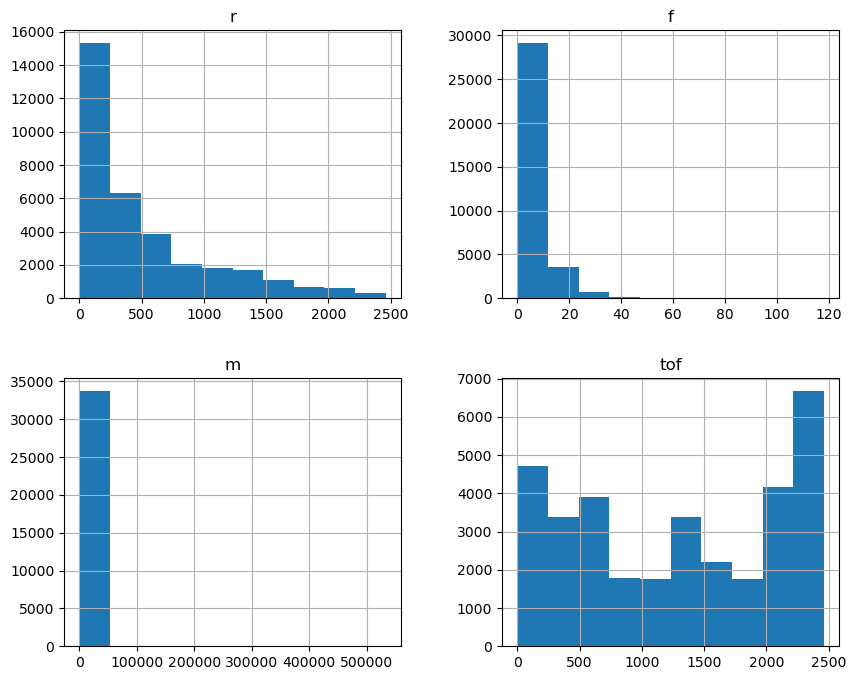

In [7]:
ecom[['r','f','m','tof']].hist(figsize=(10,8))


In [8]:
col = list(ecom.columns)
def relabel_data(col):
    for i in range(len(col)):
        if col[i] == 'r':
            col[i] = 'recency'
        elif col[i] == 'f':
            col[i] = 'overall_freq'
        elif  col[i] == 'm':
            col[i] = 'overall_mon'
        elif  col[i] == 'tof':
            col[i] = 'tof_days'
        elif  col[i][0] == 'F':
            col[i] = 'freq_' + col[i] [1:]
            col[i] = re.sub(r'\d+', ' books', col[i]) if 'nonbooks' not in col[i] else re.sub(r'\d+', '', col[i])
        elif  col[i][0] == 'M':
            col[i] = 'monetary_' + col[i] [1:]
            col[i] = re.sub(r'\d+', ' books', col[i]) if 'nonbooks' not in col[i] else re.sub(r'\d+', '', col[i])

    return col
            
ecom.columns = relabel_data(col)  

## RFM Analysis
https://www.kaggle.com/code/sarahm/customer-segmentation-using-rfm-analysis/notebook

"RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services."

In [9]:
ecom.head()

,id,recency,overall_freq,overall_mon,tof_days,freq_fiction books,freq_classics books,freq_cartoons books,freq_legends books,freq_philosophy books,...,monetary_health books,monetary_cooking books,monetary_learning books,monetary_GamesRiddles books,monetary_sports books,monetary_hobby books,monetary_nature books,monetary_encyclopaedia books,monetary_videos books,monetary_nonbooks
0,914,194,7,318.894775,1703,1,0,1,0,0,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,957,3,14,368.052246,2364,1,0,2,0,0,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1406,1489,15,423.298340,2371,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1414,155,4,71.217041,1290,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,1546,194,6,442.638184,2188,0,0,1,0,3,...,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


<Axes: >

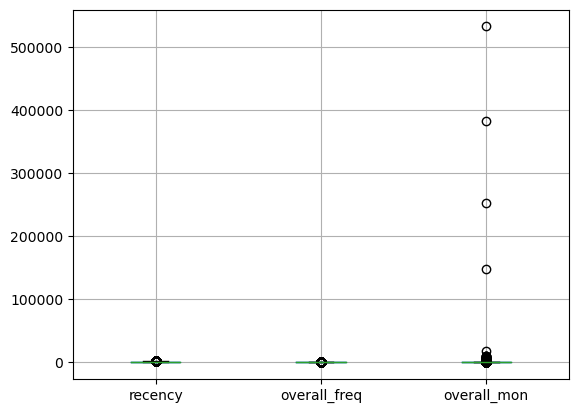

In [10]:
# select the columns for RFM
ecom_num = ecom[['recency', 'overall_freq', 'overall_mon']]

# let's check the distribution of the RFM values
ecom_num.boxplot()

### Drop the Outliers

In [11]:
# replacing outliers with null values
# https://www.askpython.com/python/examples/detection-removal-outliers-in-python

for x in ['overall_mon']:
    q75, q25 = np.percentile(ecom.loc[:,x], [75, 25])
    intr_qr = q75 - q25
    
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    
    ecom.loc[ecom[x] < min, x] = np.nan
    ecom.loc[ecom[x] > max, x] = np.nan

In [12]:
ecom.isnull().sum()

id                                 0
recency                            0
overall_freq                       0
overall_mon                     2915
tof_days                           0
                                ... 
monetary_hobby books               0
monetary_nature books              0
monetary_encyclopaedia books       0
monetary_videos books              0
monetary_nonbooks                  0
Length: 65, dtype: int64

In [13]:
# drop the null values

ecom = ecom.dropna(axis=0)

In [14]:
ecom.isnull().sum()

id                              0
recency                         0
overall_freq                    0
overall_mon                     0
tof_days                        0
                               ..
monetary_hobby books            0
monetary_nature books           0
monetary_encyclopaedia books    0
monetary_videos books           0
monetary_nonbooks               0
Length: 65, dtype: int64

### Set table for RFM

In [15]:
ecom_rfm = ecom[['id', 'recency', 'overall_freq', 'overall_mon']]
ecom_rfm.set_index('id', inplace = True)
ecom_rfm.head()

,recency,overall_freq,overall_mon
id,,,
914,194,7,318.894775
957,3,14,368.052246
1406,1489,15,423.298340
1414,155,4,71.217041
1546,194,6,442.638184


### RFM Quantiles

In [16]:
quant = ecom_rfm.quantile(q=[0.25, 0.5, 0.75])
quant

,recency,overall_freq,overall_mon
0.25,131.0,1.0,35.713715
0.50,317.0,3.0,89.657349
0.75,774.0,6.0,193.694092


In [17]:
# make it into a dictionary
quant.to_dict()

{'recency': {0.25: 131.0, 0.5: 317.0, 0.75: 774.0},
 'overall_freq': {0.25: 1.0, 0.5: 3.0, 0.75: 6.0},
 'overall_mon': {0.25: 35.7137146, 0.5: 89.657348633, 0.75: 193.6940918}}

### RFM Segments

In [18]:
# scores: 3 - 12
# the intent of doing business together
# 

In [19]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [20]:
rfm_segmentation = ecom_rfm
rfm_segmentation['R_Quartile'] = rfm_segmentation['recency'].apply(RScore, args=('recency',quant,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['overall_freq'].apply(FMScore, args=('overall_freq',quant,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['overall_mon'].apply(FMScore, args=('overall_mon',quant,))

Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most.

In [21]:
rfm_segmentation.head()

,recency,overall_freq,overall_mon,R_Quartile,F_Quartile,M_Quartile
id,,,,,,
914,194,7,318.894775,3,4,4
957,3,14,368.052246,4,4,4
1406,1489,15,423.298340,1,4,4
1414,155,4,71.217041,3,3,2
1546,194,6,442.638184,3,3,4


In [22]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,recency,overall_freq,overall_mon,R_Quartile,F_Quartile,M_Quartile,RFMScore
id,,,,,,,
914,194,7,318.894775,3,4,4,344
957,3,14,368.052246,4,4,4,444
1406,1489,15,423.298340,1,4,4,144
1414,155,4,71.217041,3,3,2,332
1546,194,6,442.638184,3,3,4,334


In [23]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print("Frequent Visitors:",len(rfm_segmentation[rfm_segmentation['RFMScore']== '442']))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Low Value Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  2050
Frequent Visitors: 46
Almost Lost:  1256
Low Value Customers:  1536
